# Data Munging ReEDS output data files for input installations

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. This input data will be used in the module files input to the PVDEMICE tool. Some will be used to explore middle, low and high projections, some for the Solar Futures Report. This journal extracts the data relevant for the current status of the PVDEMICE tool from ReEDS outputs.

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

reedsFile = str(Path().resolve().parent.parent.parent / '2020-11-2-ReEDS Outputs Solar Futures ANL.xlsx')
testfolder = str(Path().resolve().parent.parent / 'PV_DEMICE' / 'TEMP')

print ("Input file is stored in %s" % reedsFile)
print ("Your simulation will be stored in %s" % testfolder)


Input file is stored in C:\Users\blond\Documents\GitHub\2020-11-2-ReEDS Outputs Solar Futures ANL.xlsx
Your simulation will be stored in C:\Users\blond\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [65]:
cwd = os.getcwd() #grabs current working directory
rawdf = pd.read_excel(reedsFile,
                        sheet_name="Solar Capacity (GW)")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
rawdf.set_index(['scenario','year','PCA','State'], inplace=True)


In [66]:
print(rawdf.index)

MultiIndex([(                   'Adv Tech', 2010,   'p1', 'WA'),
            (                   'Adv Tech', 2010,  'p10', 'CA'),
            (                   'Adv Tech', 2010, 'p100', 'VA'),
            (                   'Adv Tech', 2010, 'p101', 'FL'),
            (                   'Adv Tech', 2010, 'p102', 'FL'),
            (                   'Adv Tech', 2010, 'p103', 'MI'),
            (                   'Adv Tech', 2010, 'p104', 'MI'),
            (                   'Adv Tech', 2010, 'p105', 'IN'),
            (                   'Adv Tech', 2010, 'p106', 'IN'),
            (                   'Adv Tech', 2010, 'p107', 'IN'),
            ...
            ('Elec-Decarb Breakthrough PV', 2050,  'p90', 'AL'),
            ('Elec-Decarb Breakthrough PV', 2050,  'p91', 'FL'),
            ('Elec-Decarb Breakthrough PV', 2050,  'p92', 'TN'),
            ('Elec-Decarb Breakthrough PV', 2050,  'p93', 'KY'),
            ('Elec-Decarb Breakthrough PV', 2050,  'p94', 'GA'),
         

### First, split up the data by scenario

In [73]:
#get the scenario names
scenario_names = rawdf.index.unique(level='scenario')
years = rawdf.index.unique(level='year')
print(years)

Int64Index([2010, 2020, 2030, 2040, 2050], dtype='int64', name='year')


The goal for the tool is to have annual installations projection 1995 through 2050.

In [68]:
#returns a df with all scenarios, installs are summed for each decade
#i.e. the GW listed in 2020, were installed between 2011 and 2020?
decade_installs_byScenario = rawdf.groupby(['scenario', 'year']).sum()
#print(decade_installs_byScenario)

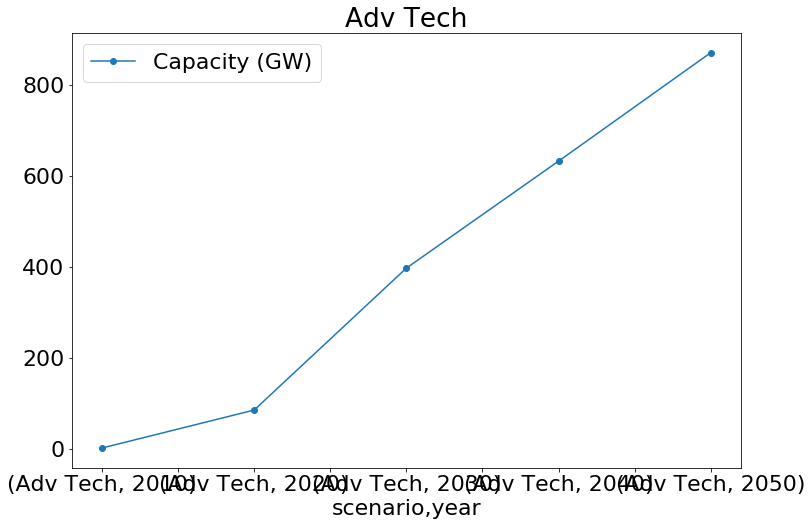

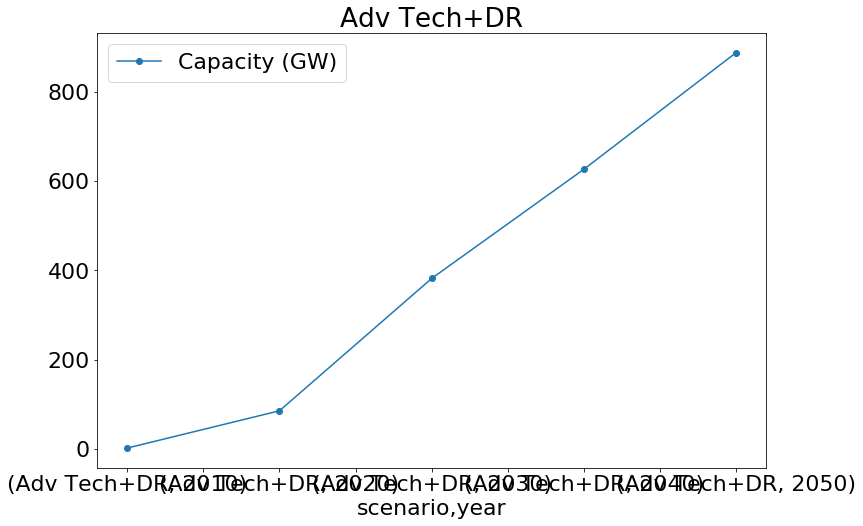

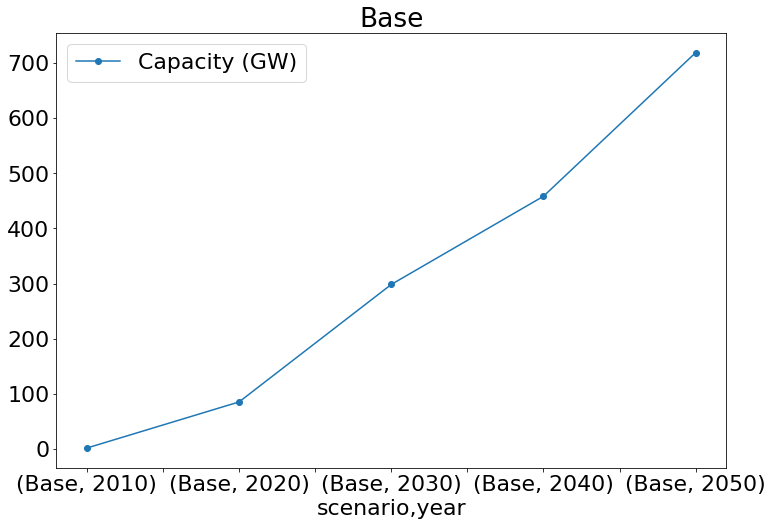

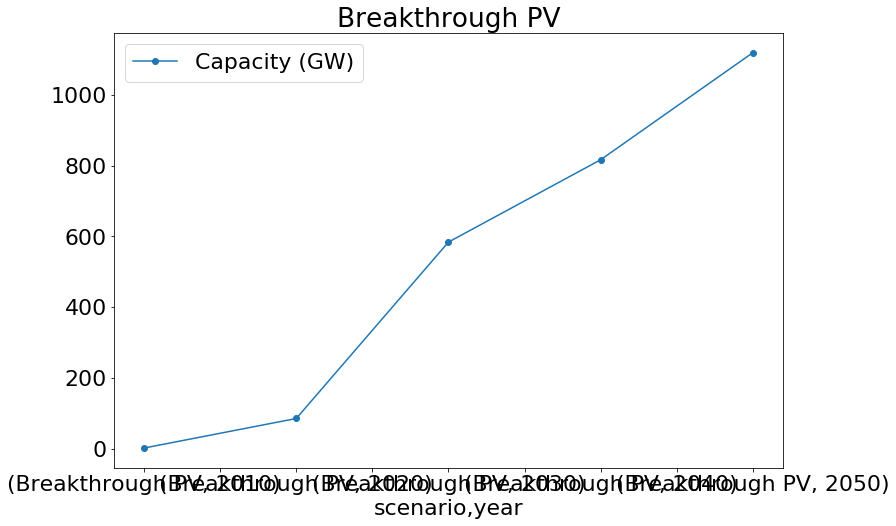

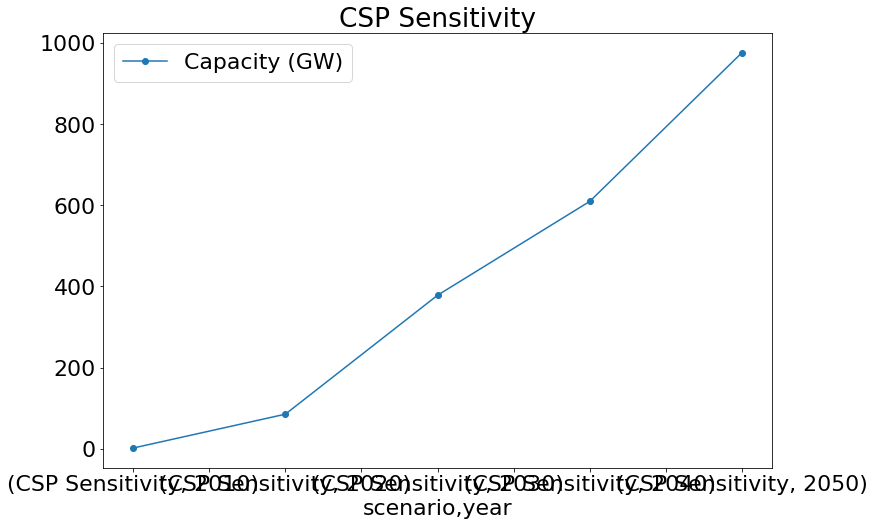

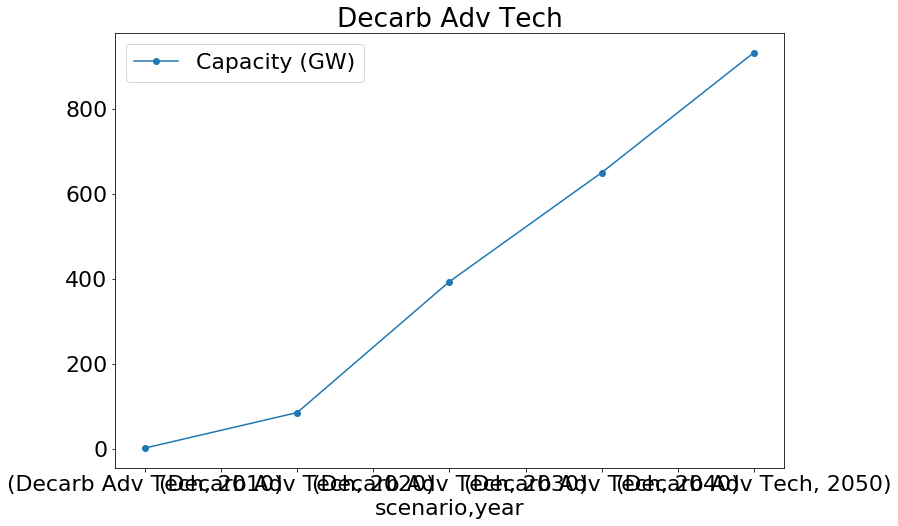

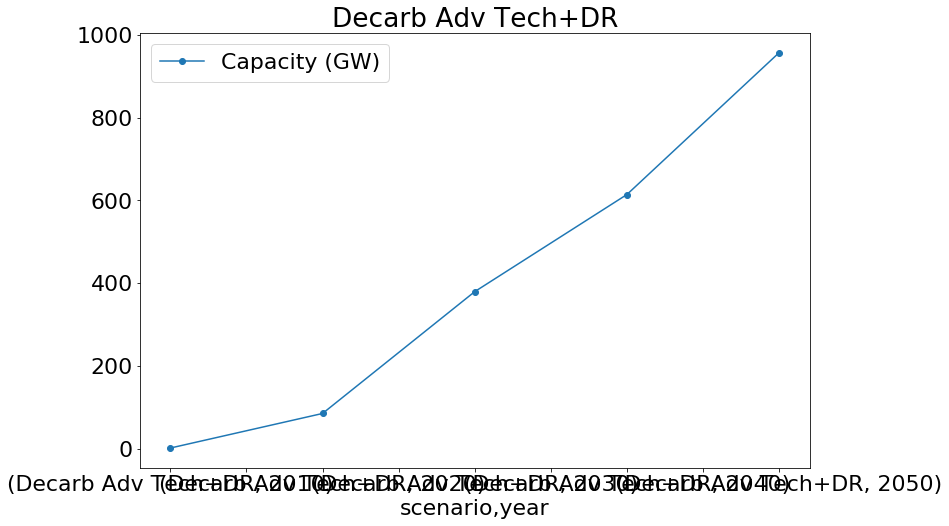

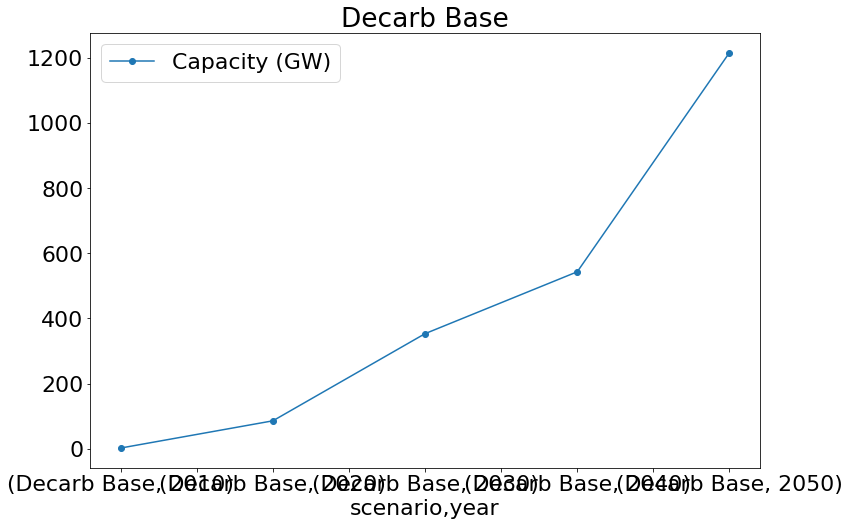

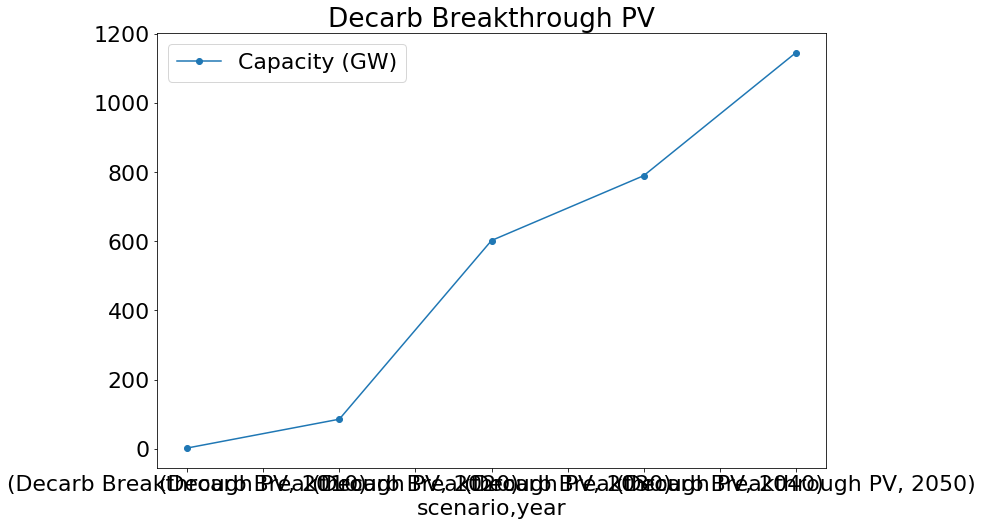

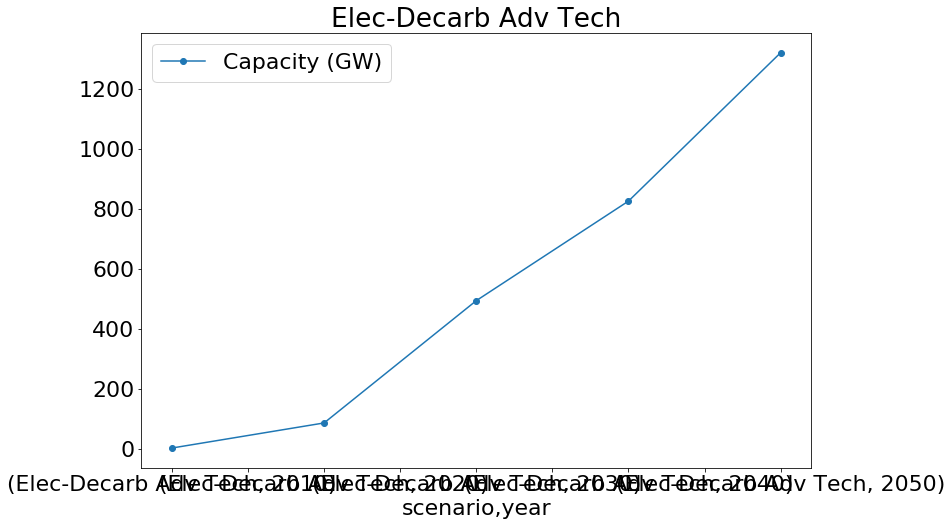

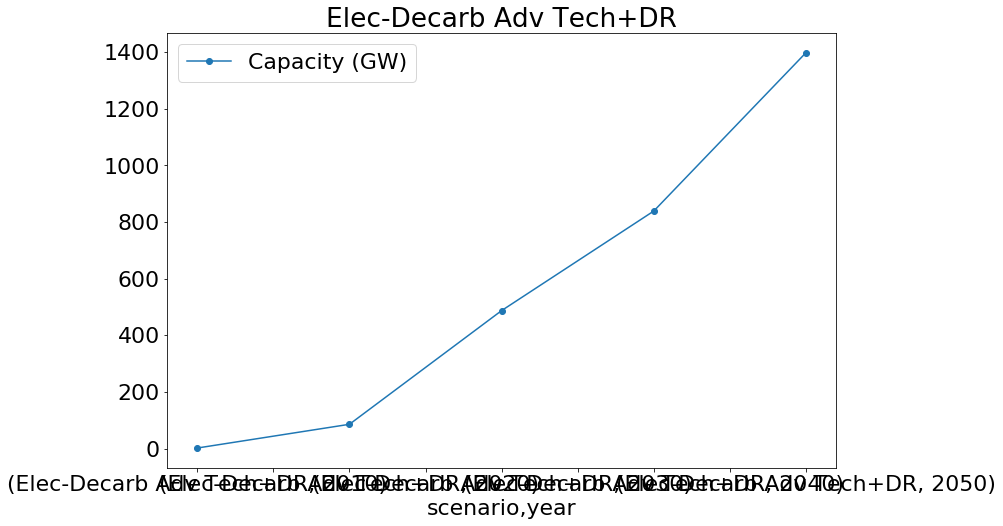

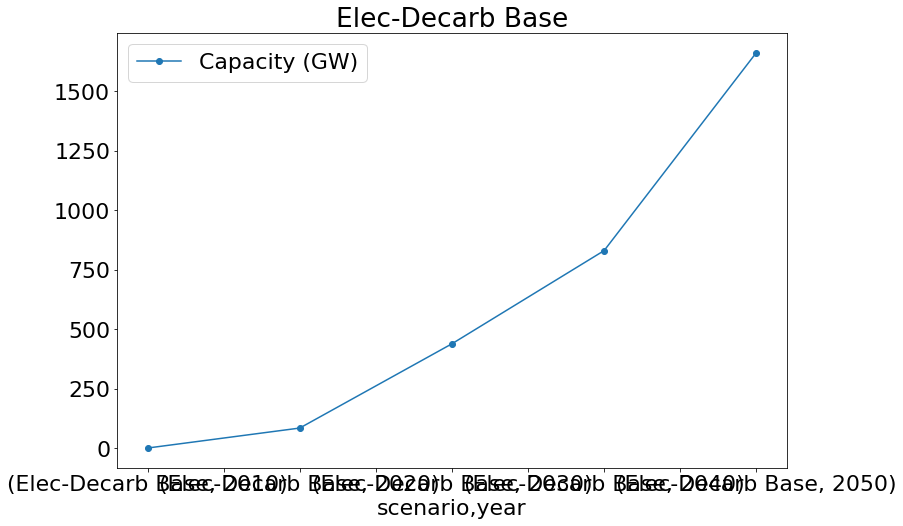

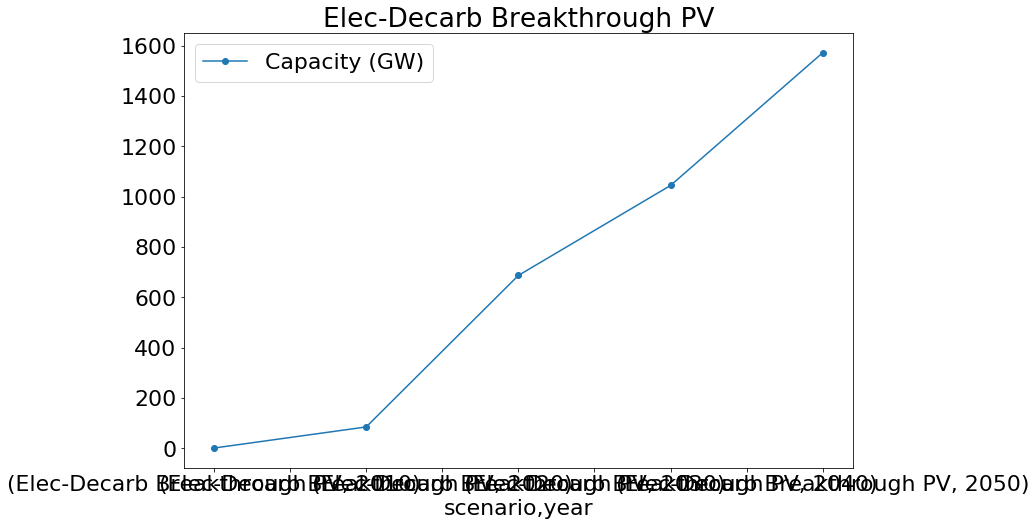

In [77]:
#find a way to cycle through the full list of names with an appropriate variable name for each
i=0
for i in range(len(scenario_names)):
    subdf = decade_installs_byScenario.loc[(decade_installs_byScenario.index.get_level_values('scenario')==scenario_names[i])]
    subdf.plot(title=scenario_names[i], marker='o')
    #print(subdf.columns) 

#print(adv_tech.tail(10))

In [9]:
#Make a pretty plot to show scenarios

plt.plot(x=decade_installs_byScenario['year'], 
         y=decade_installs_byScenario['Capacity (GW)'],
         marker='o',label=scenario_names[0])


KeyError: 'year'

In [ ]:
#Create data for between decades - interpolation non-linear

In [17]:
#print out separate csvs for each scenario
collection = ['hey', 5, 'd']
for x in collection:
    print(x)

hey
5
d
